In [1]:
! pip install -q pmdarima seaborn

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_process import arma_generate_sample
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


from pmdarima.arima import auto_arima
plt.rcParams['figure.figsize'] = (10, 5)
from statsmodels.tsa.arima_process import ArmaProcess

In [146]:
df_analisis = pd.read_csv('./serie_a_analizar.csv', sep=";")
Y=df_analisis['disp_final']



modelo1 = sm.tsa.arima.ARIMA(Y, order=(0,0,1))
resultado1 = modelo1.fit()

resultado1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             disp_final   No. Observations:                  137
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 813.220
Date:                Sat, 22 Jun 2024   AIC                          -1620.439
Time:                        20:10:16   BIC                          -1611.680
Sample:                             0   HQIC                         -1616.880
                                - 137                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9992      0.000   9078.384      0.000       0.999       0.999
ma.L1          0.2692      0.057      4.712      0.000       0.157       0.381
sigma2      4.053e-07    2.4e-08     16.897      0.000    3.58e-07    4.52e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              2077.64
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.66   Skew:                            -3.38
Prob(H) (two-sided):                  0.09   Kurtosis:                        20.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

No se puede rechazar hipotesis nula, 

In [147]:
modeloARMA = sm.tsa.arima.ARIMA(Y, order=(1,0,1))
resultadoARMA = modeloARMA.fit()

resultadoARMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             disp_final   No. Observations:                  137
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 813.667
Date:                Sat, 22 Jun 2024   AIC                          -1619.333
Time:                        20:10:47   BIC                          -1607.653
Sample:                             0   HQIC                         -1614.587
                                - 137                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9992      0.000   7997.808      0.000       0.999       0.999
ar.L1          0.3204      0.030     10.641      0.000       0.261       0.379
ma.L1         -0.0512      0.029     -1.754      0.080      -0.108       0.006
sigma2      4.031e-07    2.4e-08     16.824      0.000    3.56e-07     4.5e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2221.82
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.71   Skew:                            -3.43
Prob(H) (two-sided):                  0.07   Kurtosis:                        21.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.08e+17. Standard errors may be unstable.
"""

### Automodelo

In [148]:
stepwise_fit = auto_arima(Y, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1615.294, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1612.264, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1621.305, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1618.775, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=390.579, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1619.331, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1619.311, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1617.077, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.559 seconds


### Pronostico

In [149]:
from scipy.stats import jarque_bera, shapiro, boxcox, probplot

In [150]:
df_analisis = pd.read_csv('./serie_a_analizar.csv', sep=";")
dataoriginal=df_analisis[['Fecha','disp_final']]

dataoriginal


,Fecha,disp_final
0,2013-01-01,0.999640
1,2013-02-01,0.999772
2,2013-03-01,0.999751
3,2013-04-01,0.999630
4,2013-05-01,0.999298
...,...,...
132,2024-01-01,0.999217
133,2024-02-01,0.999379
134,2024-03-01,0.999222
135,2024-04-01,0.999084


In [151]:
dataoriginal['Fecha'] = pd.to_datetime(dataoriginal['Fecha'])
dataoriginal['Fecha'] = dataoriginal['Fecha'] + pd.offsets.MonthEnd(0)
dataoriginal.index = dataoriginal['Fecha']
del dataoriginal['Fecha']
dataoriginal=dataoriginal.asfreq('ME')
dataoriginal


/tmp/ipykernel_440165/1284885333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataoriginal['Fecha'] = pd.to_datetime(dataoriginal['Fecha'])
/tmp/ipykernel_440165/1284885333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataoriginal['Fecha'] = dataoriginal['Fecha'] + pd.offsets.MonthEnd(0)


,disp_final
Fecha,
2013-01-31,0.999640
2013-02-28,0.999772
2013-03-31,0.999751
2013-04-30,0.999630
2013-05-31,0.999298
...,...
2024-01-31,0.999217
2024-02-29,0.999379
2024-03-31,0.999222


### Transformación box cox

In [152]:
transform_data, best_lambda = boxcox(dataoriginal['disp_final'].values)
print(f" El lambda óptima aproximado es =  {best_lambda}")

 El lambda óptima aproximado es =  991.5024371729388


### Jarque Bera de los datos iniciales
Los datos no siguen una distribución normal

In [153]:
jarque_bera(Y)

SignificanceResult(statistic=1751.4241132118354, pvalue=0.0)

### Jarque Bera de los datos Transformados

In [154]:
# Para datos con transformacion de Box Cox
jarque_bera(transform_data)

SignificanceResult(statistic=0.5991138397979332, pvalue=0.7411465352232338)

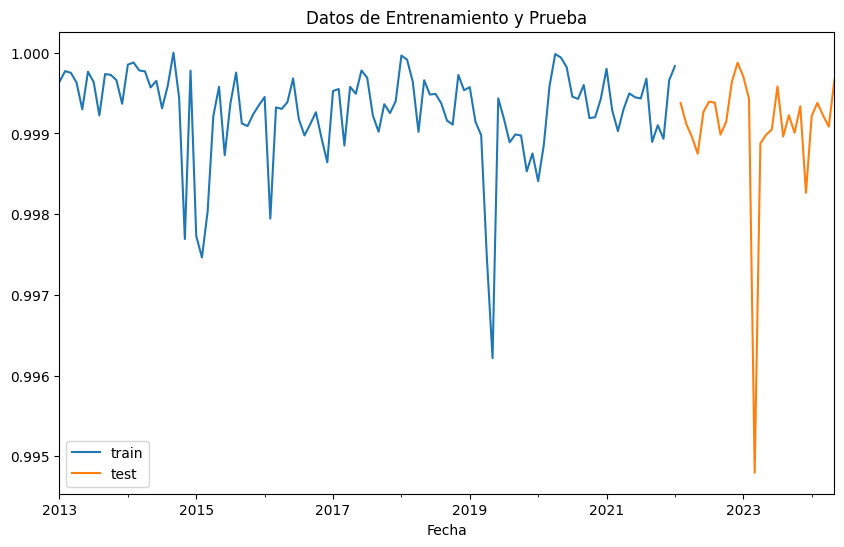

In [155]:
X = dataoriginal
train_size = int(len(dataoriginal) * 0.8)

# Separar el DataFrame en train y test
train = dataoriginal.iloc[:train_size]
test = dataoriginal.iloc[train_size:]


fig, ax = plt.subplots(figsize=(10, 6))
train.plot(ax=ax)
test.plot(ax=ax)
plt.title("Datos de Entrenamiento y Prueba")
plt.legend(['train', 'test'])
plt.show()

In [156]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
  from statsmodels.tsa.stattools import adfuller
  
  print (f'Resultados de la prueba de Dickey-Fuller para columna: {column_name}')
  dftest = adfuller(series, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print (dfoutput)
  if dftest[1] <= 0.05:
    print("Conclusion:====>")
    print("Rechazar la hipótesis nula")
    print("Los datos son estacionarios.")
  else:
    print("Conclusion:====>")
    print("No rechazar la hipótesis nula")
    print("Los datos no son estacionarios.")

In [157]:
Augmented_Dickey_Fuller_Test_func(train['disp_final'],'disp_final')

Resultados de la prueba de Dickey-Fuller para columna: disp_final
Test Statistic                -6.637589e+00
p-value                        5.512567e-09
No Lags Used                   0.000000e+00
Number of Observations Used    1.080000e+02
Critical Value (1%)           -3.492401e+00
Critical Value (5%)           -2.888697e+00
Critical Value (10%)          -2.581255e+00
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios.


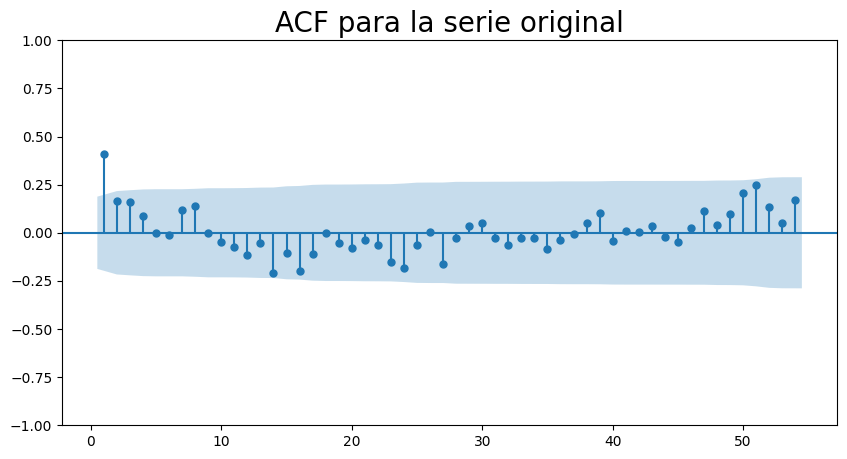

In [158]:
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(train['disp_final'], lags = 54, zero = False)
plt.title("ACF para la serie original", size = 20)
plt.show()

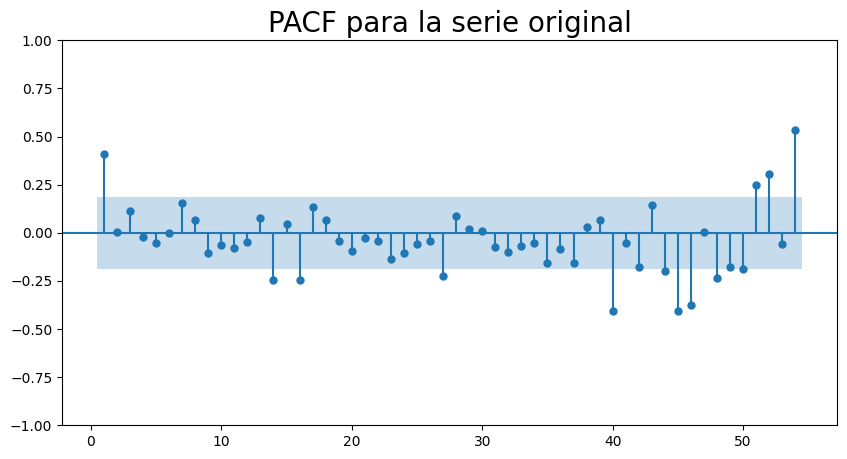

In [159]:
sgt.plot_pacf(train['disp_final'], lags = 54, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF para la serie original", size = 20)
plt.show()

In [160]:
# Modelo 1

import statsmodels.api as sm
modeloAR1 = sm.tsa.arima.ARIMA(train['disp_final'], order=(1,0,0))
resultAR1 = modeloAR1.fit()

print(resultAR1.summary())
print(f"La raiz REAL del modelo condicionado a un AR(2)  es= {resultAR1.arroots} \n vemos que es en modulo mayor a 1. Es decir, es estacionaria ")

                               SARIMAX Results                                
Dep. Variable:             disp_final   No. Observations:                  109
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 666.339
Date:                Sat, 22 Jun 2024   AIC                          -1326.678
Time:                        20:13:15   BIC                          -1318.604
Sample:                    01-31-2013   HQIC                         -1323.403
                         - 01-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9993      0.000   8075.330      0.000       0.999       1.000
ar.L1          0.4104      0.049      8.455      0.000       0.315       0.506
sigma2      2.861e-07    2.7e-08     10.582      0.0

In [161]:
# Modelo 2 - 1-14-15

modeloAR1_14_15 = sm.tsa.arima.ARIMA(train['disp_final'], order=((1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0),0,0))
modeloAR1_14_15 = modeloAR1_14_15.fit()

modeloAR1_14_15.summary()

/home/hugo/Documentos/Series_temporales/tp_serie_tiempo/.env_st1/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                   
====================================================================================
Dep. Variable:                   disp_final   No. Observations:                  109
Model:             ARIMA([1, 14, 15], 0, 0)   Log Likelihood                 668.629
Date:                      Sat, 22 Jun 2024   AIC                          -1327.258
Time:                              20:13:35   BIC                          -1313.801
Sample:                          01-31-2013   HQIC                         -1321.801
                               - 01-31-2022                                         
Covariance Type:                        opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9993   8.98e-05   1.11e+04      0.000       0.999       0.999
ar.L1          0.3842      0.052      7.365      0.000       0.282       0.486
ar.L14        -0.2227      0.117     -1.905      0.057      -0.452       0.006
ar.L15         0.0639      0.098      0.650      0.516      -0.129       0.257
sigma2      2.697e-07   2.75e-08      9.808      0.000    2.16e-07    3.24e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):               131.19
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                            -1.54
Prob(H) (two-sided):                  0.77   Kurtosis:                         7.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

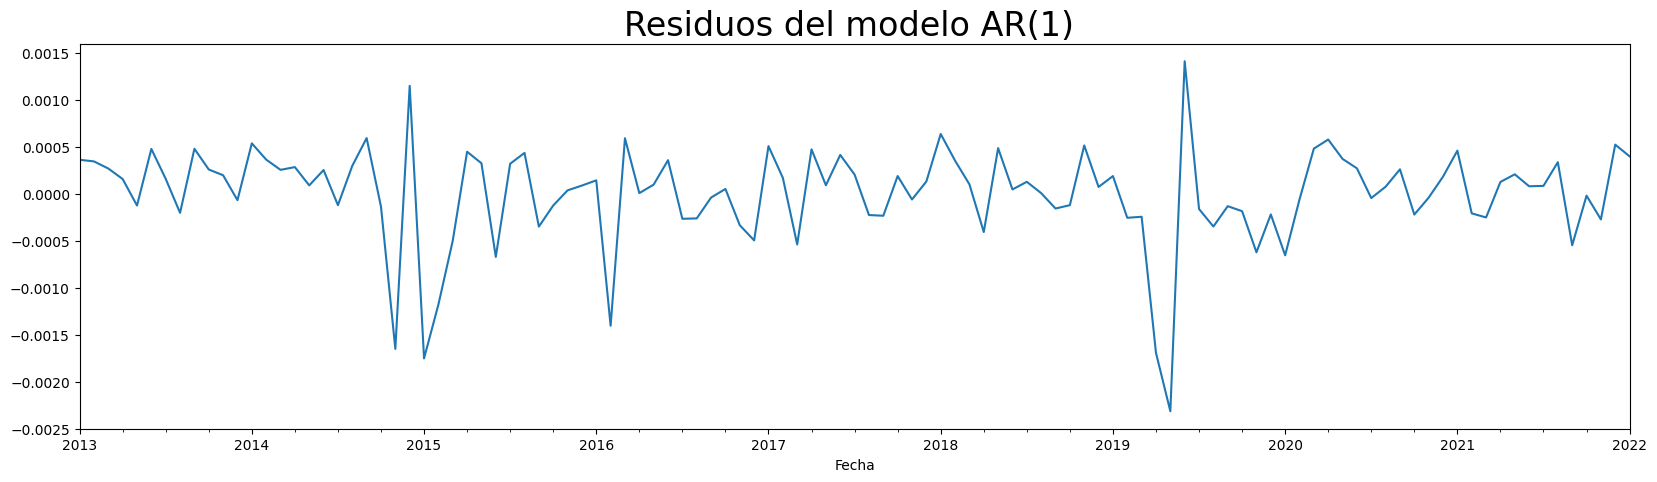

In [164]:
resultAR1.resid.plot(figsize=(20,5))
plt.title("Residuos del modelo AR(1) ",size=24)
plt.show()

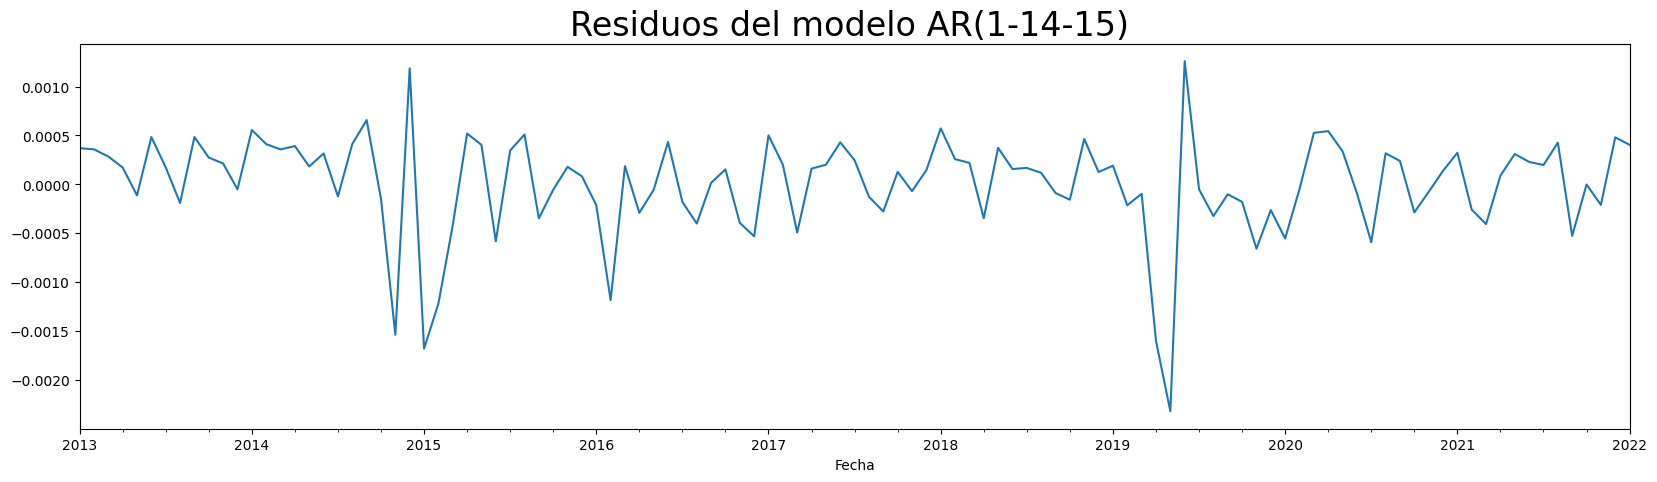

In [165]:
modeloAR1_14_15.resid.plot(figsize=(20,5))
plt.title("Residuos del modelo AR(1-14-15) ",size=24)
plt.show()

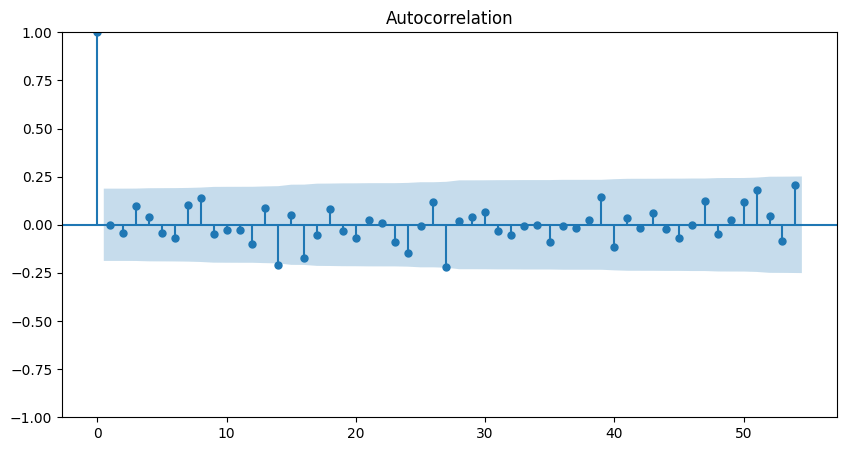

In [169]:
plot_acf(resultAR1.resid ,  lags = 54);

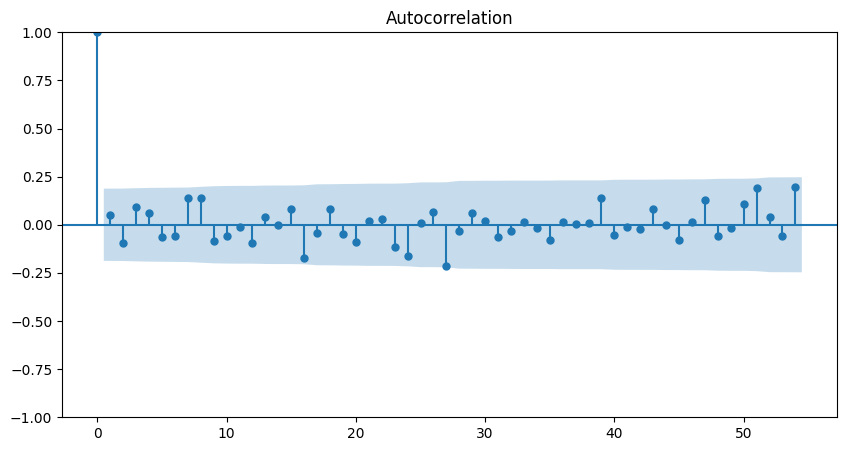

In [168]:
plot_acf(modeloAR1_14_15.resid,  lags = 54);

Text(0, 0.5, 'P-valores')

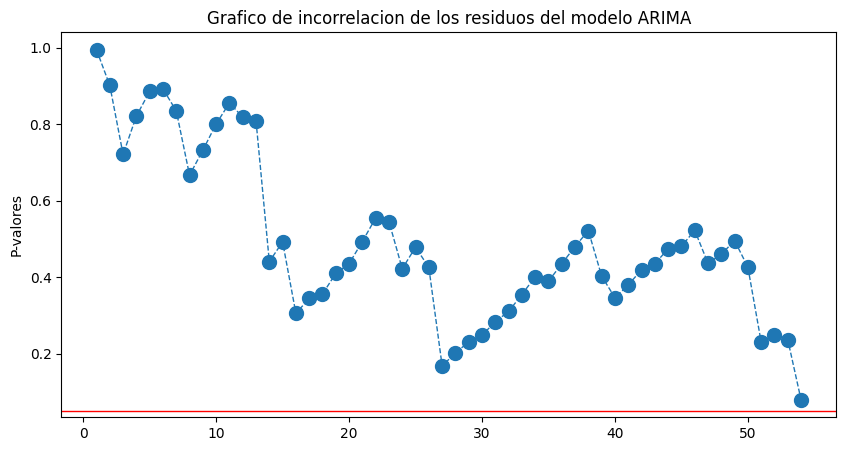

In [175]:
Incorr_residuos_modelo=sm.stats.acorr_ljungbox(resultAR1.resid, lags=54)
plt.plot(Incorr_residuos_modelo.lb_pvalue, marker='o', markersize=10, linestyle='--', linewidth=1)
plt.axhline(y=0.05, color='r', linestyle='-', linewidth=1, label='Significance level (0.05)')
plt.title("Grafico de incorrelacion de los residuos del modelo ARIMA")
plt.ylabel("P-valores")

Test de box pierce -  residuos normales


In [176]:
from statsmodels.tsa.stattools import acf
from scipy.stats import chi2
# Test Box-Pierce
lags = 10

acf_values = acf(resultAR1.resid, nlags=lags, fft=False)

# Calculamos el estadistico de prueba Q de Box-Pierce
n = len(resultAR1.resid)
Q = n * np.sum(np.square(acf_values[1:lags+1]))
p_value = 1 - chi2.cdf(Q, df=lags)


print(f'Estadística de prueba (Q): {Q:.4f}')
print(f'Valor p: {p_value:.4f}')
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay autocorrelación significativa en los residuos.")
else:
    print("No se rechaza la hipótesis nula: no hay autocorrelación significativa en los residuos.")

Estadística de prueba (Q): 5.7060
Valor p: 0.8393
No se rechaza la hipótesis nula: no hay autocorrelación significativa en los residuos.


In [182]:
na_count = train['disp_final'].isna().sum()
print(f'Número de valores NaN en la serie disp_final: {na_count}')


Número de valores NaN en la serie disp_final: 0


28

In [217]:
from sklearn.metrics import mean_squared_error

# Pasamos a la prediccion
forecastAR1 = resultAR1.get_forecast(steps=len(test['disp_final']))

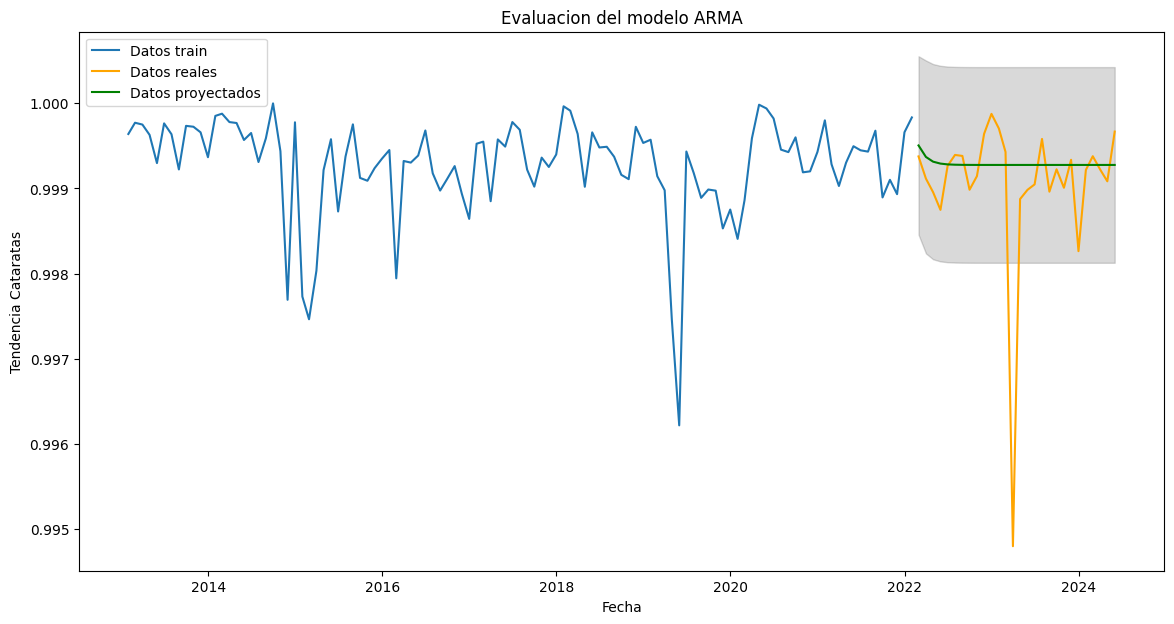

RMSE: 0.0009102888094226993


In [219]:
test_forecast_series = pd.Series(forecastAR1.predicted_mean, index=test.index)

mse = mean_squared_error(test['disp_final'], test_forecast_series)
rmse = mse**0.5

plt.figure(figsize=(14,7))
plt.plot(train['disp_final'], label='Datos train')
plt.plot(test['disp_final'], label='Datos reales', color='orange')
plt.plot(test_forecast_series, label='Datos proyectados', color='green')
plt.fill_between(test.index,
                 forecastAR1.conf_int().iloc[:, 0],
                 forecastAR1.conf_int().iloc[:, 1],
                 color='k', alpha=.15)
plt.title('Evaluacion del modelo ARMA')
plt.xlabel('Fecha')
plt.ylabel('Tendencia Cataratas')
plt.legend()
plt.show()

print('RMSE:', rmse)

In [204]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Supongamos que forecastAR1 es el resultado de tu modelo ARIMA ajustado previamente

# Generar la serie de pronóstico
test_forecast_series = pd.Series(forecastAR1.predicted_mean, index=test.index)

# Comprobar si hay NaN en las series
print(f"Valores NaN en test['disp_final']: {test['disp_final'].isna().sum()}")
print(f"Valores NaN en test_forecast_series: {test_forecast_series.isna().sum()}")



Valores NaN en test['disp_final']: 0
Valores NaN en test_forecast_series: 4


In [203]:
len(test.index)

28

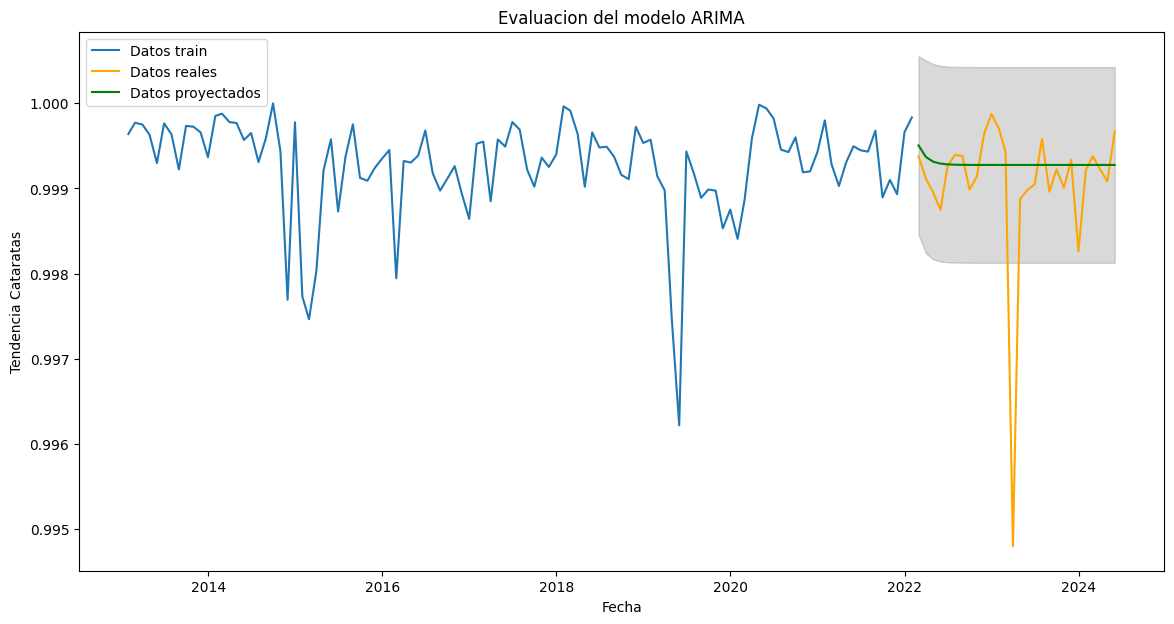

RMSE: 0.0009102888094226993


In [220]:
# Eliminar filas con NaN en ambas series
test_clean = test['disp_final'].dropna()
test_forecast_series_clean = test_forecast_series.dropna()

# Asegurarse de que los índices coincidan
common_index = test_clean.index.intersection(test_forecast_series_clean.index)
test_clean = test_clean.loc[common_index]
test_forecast_series_clean = test_forecast_series_clean.loc[common_index]

# Calcular MSE y RMSE
mse = mean_squared_error(test_clean, test_forecast_series_clean)
rmse = mse**0.5

# Graficar los resultados
plt.figure(figsize=(14,7))
plt.plot(train['disp_final'], label='Datos train')
plt.plot(test['disp_final'], label='Datos reales', color='orange')
plt.plot(test_forecast_series, label='Datos proyectados', color='green')
plt.fill_between(test.index,
                 forecastAR1.conf_int().iloc[:, 0],
                 forecastAR1.conf_int().iloc[:, 1],
                 color='k', alpha=.15)
plt.title('Evaluacion del modelo ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Tendencia Cataratas')
plt.legend()
plt.show()

print('RMSE:', rmse)

In [ ]:
X = dataoriginal
train_size = int(len(dataoriginal) * 0.8)

# Separar el DataFrame en train y test
train = dataoriginal.iloc[:train_size]
test = dataoriginal.iloc[train_size:]

In [223]:
dataoriginal_prom_mov = dataoriginal.copy()
dataoriginal_prom_mov['promedio_movil_12_disp_final'] = dataoriginal_prom_mov['disp_final'].rolling(window=12).mean()
dataoriginal_prom_mov

,disp_final,promedio_movil_12_disp_final
Fecha,,
2013-01-31,0.999640,NaN
2013-02-28,0.999772,NaN
2013-03-31,0.999751,NaN
2013-04-30,0.999630,NaN
2013-05-31,0.999298,NaN
...,...,...
2024-01-31,0.999217,0.998727
2024-02-29,0.999379,0.998723
2024-03-31,0.999222,0.999092


In [246]:
# Eliminar filas con valores NA en la columna 'promedio_movil_12_disp_final'
data_cleaned = dataoriginal_prom_mov.dropna(subset=['promedio_movil_12_disp_final'])

# Verificar el resultado
print(data_cleaned.head())
print(f"Filas originales: {len(dataoriginal_prom_mov)}, Filas después de eliminar NA: {len(data_cleaned)}")

            disp_final  promedio_movil_12_disp_final
Fecha                                               
2013-12-31    0.999367                      0.999600
2014-01-31    0.999853                      0.999618
2014-02-28    0.999879                      0.999627
2014-03-31    0.999780                      0.999629
2014-04-30    0.999769                      0.999641
Filas originales: 137, Filas después de eliminar NA: 126


### Primera = promedio móvil de 12 periodos

<Axes: xlabel='Fecha'>

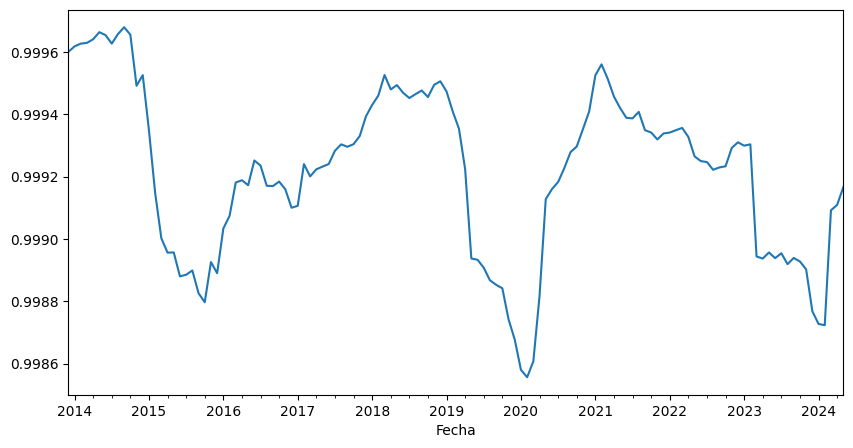

In [225]:
data_cleaned.promedio_movil_12_disp_final.plot()

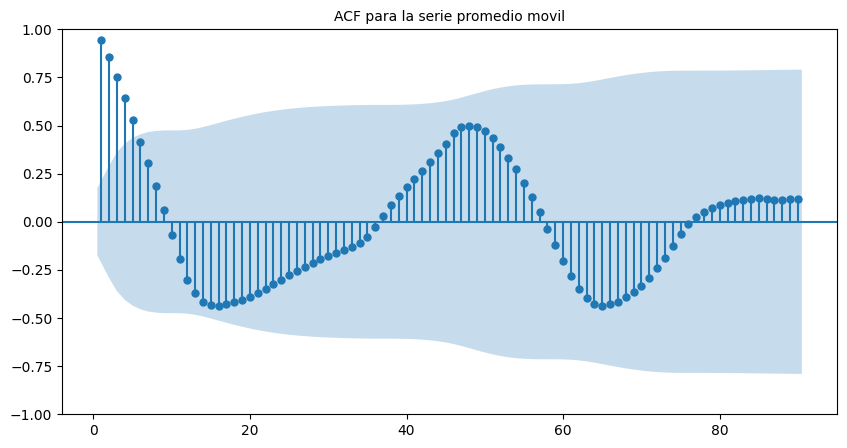

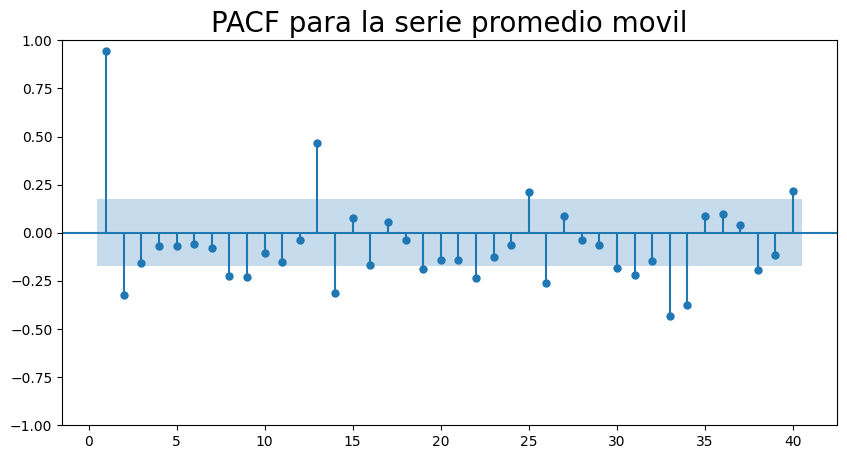

In [226]:
sgt.plot_acf(data_cleaned.promedio_movil_12_disp_final , zero = False, lags = 90)
plt.title("ACF para la serie promedio movil", size = 10)
plt.show()

sgt.plot_pacf(data_cleaned.promedio_movil_12_disp_final, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF para la serie promedio movil", size = 20)
plt.show()

### Segunda transformacion = quitarle el componente estacional


In [238]:
from statsmodels.tsa.seasonal import seasonal_decompose

data_cleaned_3 = data_cleaned.copy()


<Axes: xlabel='Fecha'>

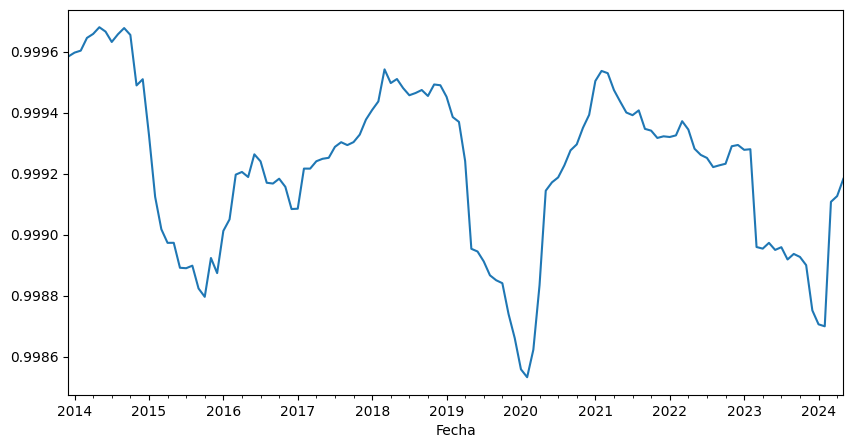

In [239]:
result = seasonal_decompose(data_cleaned_3['promedio_movil_12_disp_final'], model='additive', period=12)
data_cleaned_3['deseasonalizada'] = data_cleaned_3['promedio_movil_12_disp_final'] - result.seasonal
# Codigo opcional
data_cleaned_3.dropna(inplace=True)

data_cleaned_3.deseasonalizada.plot()

# Tercer transformacion = diferenciacion de la serie ya deseasonalizada

In [245]:
data_cleaned_4 = data_cleaned_3.copy()
data_cleaned_4['deseasonalizada'] = data_cleaned_4['deseasonalizada'].diff()
data_cleaned_4 = data_cleaned_4.dropna(subset=['deseasonalizada'])
data_cleaned_4

,disp_final,promedio_movil_12_disp_final,deseasonalizada
Fecha,,,
2014-01-31,0.999853,0.999618,0.000013
2014-02-28,0.999879,0.999627,0.000006
2014-03-31,0.999780,0.999629,0.000042
2014-04-30,0.999769,0.999641,0.000013
2014-05-31,0.999570,0.999664,0.000022
...,...,...,...
2024-01-31,0.999217,0.998727,-0.000046
2024-02-29,0.999379,0.998723,-0.000007
2024-03-31,0.999222,0.999092,0.000408


### Cuarta transformacion = diferenciacion

In [248]:
data_cleaned_dif = data_cleaned.copy()
data_cleaned_dif['Valor_Dif'] = data_cleaned_dif['promedio_movil_12_disp_final'].diff()
data_cleaned_dif.dropna(inplace=True)
data_cleaned_dif

,disp_final,promedio_movil_12_disp_final,Valor_Dif
Fecha,,,
2014-01-31,0.999853,0.999618,0.000018
2014-02-28,0.999879,0.999627,0.000009
2014-03-31,0.999780,0.999629,0.000002
2014-04-30,0.999769,0.999641,0.000012
2014-05-31,0.999570,0.999664,0.000023
...,...,...,...
2024-01-31,0.999217,0.998727,-0.000041
2024-02-29,0.999379,0.998723,-0.000004
2024-03-31,0.999222,0.999092,0.000369


In [249]:
X_diff = data_cleaned_dif[['Valor_Dif' ]]
train_size = int(len(X_diff) * 0.8)
# Separar el DataFrame en train y test
train_diff = dataoriginal.iloc[:train_size]
test_diff = dataoriginal.iloc[train_size:]


X_diff.head()



,Valor_Dif
Fecha,
2014-01-31,0.000018
2014-02-28,0.000009
2014-03-31,0.000002
2014-04-30,0.000012
2014-05-31,0.000023


In [250]:
dataoriginal

,disp_final
Fecha,
2013-01-31,0.999640
2013-02-28,0.999772
2013-03-31,0.999751
2013-04-30,0.999630
2013-05-31,0.999298
...,...
2024-01-31,0.999217
2024-02-29,0.999379
2024-03-31,0.999222


In [252]:
dataoriginal_prom_mov = dataoriginal.copy()

dataoriginal_prom_mov['rolling_mean'] = dataoriginal_prom_mov['disp_final'].rolling(window=12).mean()

# Puedes restar el promedio móvil de los datos originales para eliminar la estacionalidad
dataoriginal_prom_mov['deseasonalized'] = dataoriginal_prom_mov['disp_final'] - dataoriginal_prom_mov['rolling_mean']
dataoriginal_prom_mov.dropna(inplace=True)

dataoriginal_prom_mov

,disp_final,rolling_mean,deseasonalized
Fecha,,,
2013-12-31,0.999367,0.999600,-0.000233
2014-01-31,0.999853,0.999618,0.000235
2014-02-28,0.999879,0.999627,0.000252
2014-03-31,0.999780,0.999629,0.000151
2014-04-30,0.999769,0.999641,0.000128
...,...,...,...
2024-01-31,0.999217,0.998727,0.000490
2024-02-29,0.999379,0.998723,0.000656
2024-03-31,0.999222,0.999092,0.000130


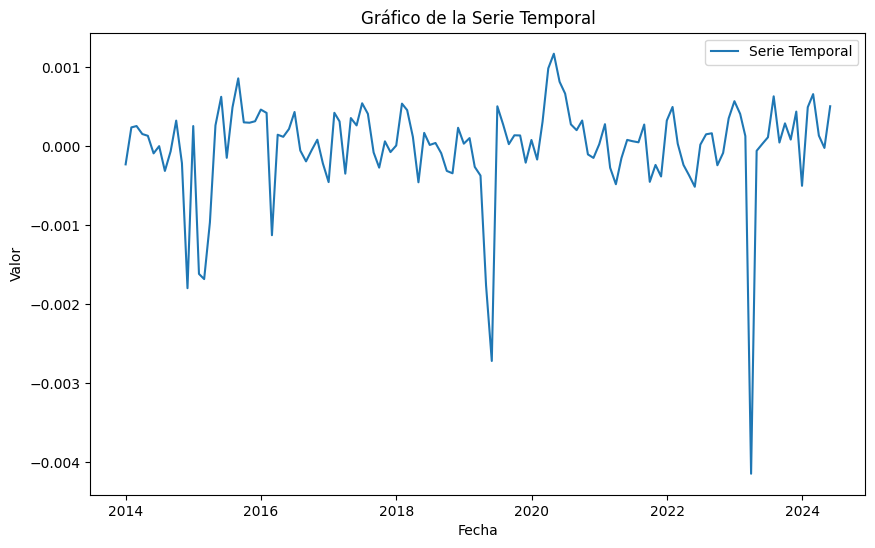

In [253]:
plt.figure(figsize=(10, 6))
plt.plot(dataoriginal_prom_mov.index, dataoriginal_prom_mov['deseasonalized'], label='Serie Temporal')
plt.title('Gráfico de la Serie Temporal')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()

In [254]:


stepwise_fit = auto_arima(dataoriginal_prom_mov['rolling_mean'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1978.709, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1711.627, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2003.784, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1801.954, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=359.375, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2016.157, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2017.279, Time=0.08 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-2015.789, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2014.149, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2010.587, Time=0.08 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-2013.224, Time=0.32 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 1.373 seconds


In [255]:
import statsmodels.api as sm
modelo1 = sm.tsa.arima.ARIMA(dataoriginal_prom_mov['rolling_mean'], order=((3,0,0)))
resultado1 = modelo1.fit()

resultado1.summary()

/home/hugo/Documentos/Series_temporales/tp_serie_tiempo/.env_st1/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           rolling_mean   No. Observations:                  126
Model:                 ARIMA(3, 0, 0)   Log Likelihood                1013.786
Date:                Sun, 23 Jun 2024   AIC                          -2017.572
Time:                        01:43:21   BIC                          -2003.390
Sample:                    12-31-2013   HQIC                         -2011.810
                         - 05-31-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9992   7.57e-05   1.32e+04      0.000       0.999       0.999
ar.L1          1.2009   8.58e-08    1.4e+07      0.000       1.201       1.201
ar.L2         -0.1271    8.9e-08  -1.43e+06      0.000      -0.127      -0.127
ar.L3         -0.1557   8.09e-08  -1.93e+06      0.000      -0.156      -0.156
sigma2      5.906e-09   4.06e-10     14.535      0.000    5.11e-09     6.7e-09
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               169.47
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.57   Skew:                            -0.25
Prob(H) (two-sided):                  0.15   Kurtosis:                         8.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.01e+22. Standard errors may be unstable.
"""

In [256]:
dataoriginal_prom_mov

,disp_final,rolling_mean,deseasonalized
Fecha,,,
2013-12-31,0.999367,0.999600,-0.000233
2014-01-31,0.999853,0.999618,0.000235
2014-02-28,0.999879,0.999627,0.000252
2014-03-31,0.999780,0.999629,0.000151
2014-04-30,0.999769,0.999641,0.000128
...,...,...,...
2024-01-31,0.999217,0.998727,0.000490
2024-02-29,0.999379,0.998723,0.000656
2024-03-31,0.999222,0.999092,0.000130


In [258]:
stepwise_fit = auto_arima(dataoriginal_prom_mov.deseasonalized, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1488.790, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1488.942, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1494.767, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1494.650, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1490.845, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1492.810, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1492.818, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1490.837, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-1496.713, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-1494.756, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1494.763, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-1496.587, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-1492.787, Time=0.07 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.007 seconds


In [259]:
Augmented_Dickey_Fuller_Test_func(dataoriginal_prom_mov['deseasonalized'],'deseasonalized')

Resultados de la prueba de Dickey-Fuller para columna: deseasonalized
Test Statistic                -8.599582e+00
p-value                        6.927270e-14
No Lags Used                   0.000000e+00
Number of Observations Used    1.250000e+02
Critical Value (1%)           -3.483779e+00
Critical Value (5%)           -2.884954e+00
Critical Value (10%)          -2.579257e+00
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios.


In [261]:
from pmdarima.arima.utils import ndiffs
n_adf = ndiffs(dataoriginal_prom_mov['deseasonalized'], test='adf')
print(f'Estimado de número de diferencias con ADF test es {n_adf}')

Estimado de número de diferencias con ADF test es 0


In [268]:
def test_stationarity(timeseries):

    #Rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 6))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    #std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

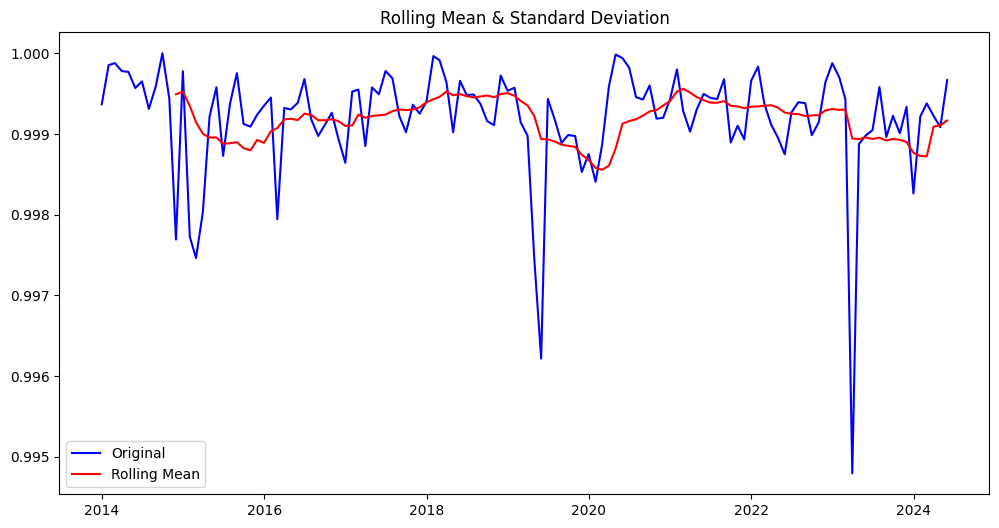

In [269]:
test_stationarity(dataoriginal_prom_mov['disp_final'])

In [283]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import statsmodels.tsa.stattools as tsa
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima.utils import ndiffs
from pmdarima.arima import ADFTest
from matplotlib import pyplot

In [284]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima, ndiffs, nsdiffs
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.diagnostic import acorr_ljungbox, acorr_breusch_godfrey
from scipy.stats import jarque_bera, shapiro, boxcox, probplot
from datetime import timedelta
import statsmodels.api as sm

In [304]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def print_test_afd(y):
    resultado = adfuller(y)
    print('Estadistico ADF: %f' % resultado[0])
    print('p-valor: %f' % resultado[1])
    print('Valores criticos:')
    for key, valor in resultado[4].items():
        print('\t%s: %.3f' % (key, valor))

# Supongamos que ya has limpiado el DataFrame 'dataoriginal_prom_mov'
data_cleaned = dataoriginal_prom_mov.dropna(subset=['promedio_movil_12_disp_final'])

# Realizar el test ADF en la columna 'disp_final'
print_test_afd(data_cleaned['disp_final'])

Estadistico ADF: -8.686401
p-valor: 0.000000
Valores criticos:
	1%: -3.479
	5%: -2.883
	10%: -2.578


Dado el test mi serie original es estacionaria.

In [303]:
dataoriginal

,disp_final
Fecha,
2013-01-31,0.999640
2013-02-28,0.999772
2013-03-31,0.999751
2013-04-30,0.999630
2013-05-31,0.999298
...,...
2024-01-31,0.999217
2024-02-29,0.999379
2024-03-31,0.999222


In [300]:
print_test_afd(dataoriginal_prom_mov['disp_final'])

AttributeError: module 'statsmodels.tsa' has no attribute 'adfuller'

In [301]:
tsa.adfuller(dataoriginal_prom_mov['disp_final'])

(-8.4724666548999,
 1.4650877005434094e-13,
 0,
 125,
 {'1%': -3.4837793736959997, '5%': -2.88495387648, '10%': -2.579256976},
 -1324.3062628780494)

In [299]:
def estacionario(y):
  # Estimado de número de diferencias con ADF test:Dickey-Fuller
  n_adf = ndiffs(y, test='adf')  # -> 0

  # KPSS test (auto_arima default): Kwiatkowski-Phillips-Schmidt-Shin
  n_kpss = ndiffs(y, test='kpss')  # -> 0

  # PP test: Phillips-Perron
  n_pp = ndiffs(y, test='pp')  # -> 0

  print('Estimado de número de diferencias con ADF test')
  print(n_adf)

  print('Estimado de número de diferencias con KPSS test')
  print(n_kpss)

  print('Estimado de número de diferencias con PP test')
  print(n_pp)

  print('Se debe realizar diferenciación (should_diff) ADF Test')
  adftest = ADFTest(alpha=0.05)
  print(adftest.should_diff(y))


estacionario(dataoriginal_prom_mov['disp_final'])

Estimado de número de diferencias con ADF test
0
Estimado de número de diferencias con KPSS test
0
Estimado de número de diferencias con PP test
0
Se debe realizar diferenciación (should_diff) ADF Test
(0.01, False)


In [295]:
len(dataoriginal_prom_mov['disp_final'])

126

In [306]:
dataoriginal_prom_mov

,disp_final,rolling_mean,deseasonalized
Fecha,,,
2013-12-31,0.999367,0.999600,-0.000233
2014-01-31,0.999853,0.999618,0.000235
2014-02-28,0.999879,0.999627,0.000252
2014-03-31,0.999780,0.999629,0.000151
2014-04-30,0.999769,0.999641,0.000128
...,...,...,...
2024-01-31,0.999217,0.998727,0.000490
2024-02-29,0.999379,0.998723,0.000656
2024-03-31,0.999222,0.999092,0.000130


In [308]:
Augmented_Dickey_Fuller_Test_func(dataoriginal_prom_mov['rolling_mean'], 'rolling_mean')

Resultados de la prueba de Dickey-Fuller para columna: rolling_mean
Test Statistic                  -3.242248
p-value                          0.017666
No Lags Used                    13.000000
Number of Observations Used    112.000000
Critical Value (1%)             -3.490131
Critical Value (5%)             -2.887712
Critical Value (10%)            -2.580730
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios.


### Prueba de heterocedasticidad

In [314]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tsa.ar_model import AutoReg
import pandas as pd

# Supongamos que 'y' es tu serie temporal
# Ajusta un modelo autoregresivo (AR)
Y = dataoriginal['disp_final']

modeloAR1 = sm.tsa.arima.ARIMA(Y, order=(1,0,0))
resultadosAR1 = modeloAR1.fit()

resultadosAR1.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             disp_final   No. Observations:                  137
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 813.654
Date:                Sun, 23 Jun 2024   AIC                          -1621.308
Time:                        03:22:29   BIC                          -1612.548
Sample:                    01-31-2013   HQIC                         -1617.748
                         - 05-31-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9992      0.000   7956.222      0.000       0.999       0.999
ar.L1          0.2793      0.059      4.767      0.000       0.164       0.394
sigma2      4.062e-07   2.45e-08     16.556      0.000    3.58e-07    4.54e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2194.22
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.70   Skew:                            -3.41
Prob(H) (two-sided):                  0.07   Kurtosis:                        21.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [318]:
residuals = resultadosAR1.resid

# Agrega una constante a los residuos
X = sm.add_constant(residuals)

# Realiza la prueba de Breusch-Pagan
bp_test = sms.het_breuschpagan(residuals, X)

# Resultados
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
bp_results = dict(zip(labels, bp_test))
print("Breusch-Pagan Test Results:", bp_results)

Breusch-Pagan Test Results: {'LM Statistic': 78.08719221500996, 'LM-Test p-value': 9.859113986057144e-19, 'F-Statistic': 178.9385253457942, 'F-Test p-value': 1.6451183874079424e-26}
